# OBJECTIVE

##  To create a classfifer based on nose samples or throat or combination of these two 

In [1]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 58.8 MB/s eta 0:00:00


In [5]:

import calour as ca
ca.set_log_level(11)
%matplotlib inline

import numpy as np
np.random.seed(2018)

ca.__version__

'2019.5.1'

In [6]:
cfs=ca.read_amplicon('otu_table.biom',
                     'metadata.txt',
                     normalize=10000,min_reads=1000)

2025-02-10 14:32:37 INFO loaded 290 samples, 4572 features
2025-02-10 14:32:37 WARNING These have metadata but do not have data - dropped (1): {'524.ESC.1.54.OPR'}
2025-02-10 14:32:37 WARNING Do you forget to normalize your data? It is required before running this function
2025-02-10 14:32:37 INFO After filtering, 272 remain.


/opt/conda/lib/python3.12/site-packages/calour/util.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not isinstance(exp.feature_metadata['taxonomy'][0], list):


In [7]:
cfs=cfs.filter_sum_abundance(10)
cfs=cfs.cluster_features()

2025-02-10 14:32:37 INFO After filtering, 2171 remain.
2025-02-10 14:32:37 INFO After filtering, 2171 remain.


2025-02-10 14:32:38 WARNING Database interface dbbact_calour.dbbact not installed.
Skipping.
You can install the database using:
pip install git+git://github.com/amnona/dbbact-calour
For details see: www.dbbact.org


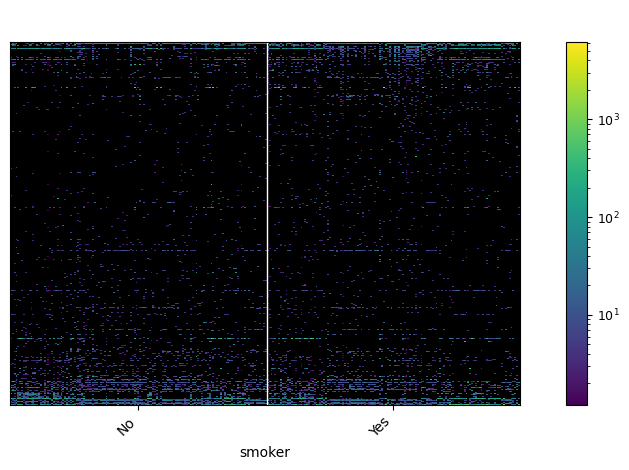

In [8]:
x=cfs.sort_samples('smoker').sort_centroid(n=0.001).plot(sample_field='smoker')

In [9]:

print(cfs.sample_metadata['airwaysite'].unique())

['Nose' 'Throat']


In [10]:
nose_samples = cfs.filter_samples('airwaysite', ['Nose'])
print('* Filtered for Nose Samples:\n%s' % nose_samples)

* Filtered for Nose Samples:
AmpliconExperiment with 136 samples, 2171 features


In [11]:
print(nose_samples.sample_metadata['smoker'].value_counts())

smoker
No     69
Yes    67
Name: count, dtype: int64


In [12]:
throat_samples = cfs.filter_samples('airwaysite', ['Throat'])
print('* Filtered for Throat Samples:\n%s' % throat_samples)


* Filtered for Throat Samples:
AmpliconExperiment with 136 samples, 2171 features


In [13]:
print(throat_samples.shape)

(136, 2171)


In [14]:
print(throat_samples.sample_metadata['smoker'].value_counts())

smoker
Yes    68
No     68
Name: count, dtype: int64


In [15]:
both_samples = cfs.filter_samples('airwaysite', ['Nose','Throat'])
print('* Filtered for Throat Samples:\n%s' % throat_samples)


* Filtered for Throat Samples:
AmpliconExperiment with 136 samples, 2171 features


In [16]:
# throat_samples.sample_metadata.hist()

# nose_samples.sample_metadata.hist()

# both_samples.sample_metadata.hist()

2025-02-10 14:32:41 INFO After filtering, 2171 remain.
2025-02-10 14:32:41 INFO After filtering, 2171 remain.
2025-02-10 14:32:41 WARNING Database interface dbbact_calour.dbbact not installed.
Skipping.
You can install the database using:
pip install git+git://github.com/amnona/dbbact-calour
For details see: www.dbbact.org


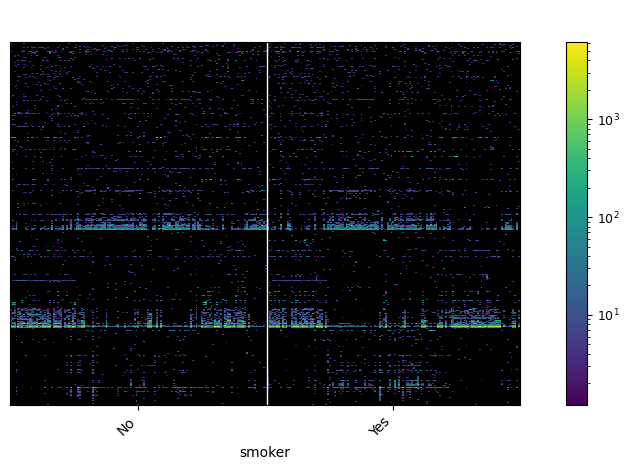

In [17]:
cfs=cfs.filter_sum_abundance(10)

cfs=cfs.cluster_features()

cfs=cfs.sort_samples('smoker')

cfs.plot(sample_field='smoker')

# FEATURE EXTRACTION USING DIFF ABUNDANCE

In [18]:
nose_samples = cfs.filter_samples('airwaysite', 'Nose')
print('* Filtered for Nose Samples:\n%s' % nose_samples)

nose_diff_abundance = nose_samples.diff_abundance('smoker', 'Yes', 'No',fdr_method='bhfdr', random_seed=2018)
print('* Nose Differential Abundance Results:\n%s' % nose_diff_abundance)

* Filtered for Nose Samples:
AmpliconExperiment with 136 samples, 2171 features
2025-02-10 14:32:42 INFO 136 samples with both values
2025-02-10 14:32:42 INFO After filtering, 1792 remain.
2025-02-10 14:32:42 INFO 67 samples with value 1 (['Yes'])
2025-02-10 14:32:42 INFO number of higher in Yes: 62. number of higher in No : 12. total 74
* Nose Differential Abundance Results:
AmpliconExperiment with 136 samples, 74 features


In [19]:
throat_samples = cfs.filter_samples('airwaysite', 'Throat')
print('* Filtered for Throat Samples:\n%s' % throat_samples)


throat_diff_abundance = throat_samples.diff_abundance('smoker', 'Yes', 'No',fdr_method='bhfdr',  random_seed=2018)
print('* Throat Differential Abundance Results:\n%s' % throat_diff_abundance)

* Filtered for Throat Samples:
AmpliconExperiment with 136 samples, 2171 features
2025-02-10 14:32:42 INFO 136 samples with both values
2025-02-10 14:32:42 INFO After filtering, 1682 remain.
2025-02-10 14:32:42 INFO 68 samples with value 1 (['Yes'])
2025-02-10 14:32:43 INFO number of higher in Yes: 4. number of higher in No : 19. total 23
* Throat Differential Abundance Results:
AmpliconExperiment with 136 samples, 23 features


In [20]:
print(throat_diff_abundance.shape)

(136, 23)


In [21]:
y = throat_diff_abundance.sample_metadata['smoker']
print (y)

#SampleID
524.ESC.1.33.OPR      No
524.ESC.1.72.OPL      No
524.ESC.1.1.OPR       No
524.ESC.1.12.OPR      No
524.ESC.1.13.OPL      No
                    ... 
524.ESC.1.63.OPR     Yes
524.ESC.1.48.OPL     Yes
524.ESC.1.15.OPL     Yes
524.ESC.1.55a.OPL    Yes
524.ESC.1.70.OPL     Yes
Name: smoker, Length: 136, dtype: object


In [22]:
print(y.shape)

(136,)


In [23]:
# X = throat_diff_abundance
# y = throat_diff_abundance.sample_metadata['smoker']


X_array = throat_diff_abundance.get_data(sparse=False)

#    The ".values" attribute (or "to_numpy()") will give you a plain NumPy array.
y_array = throat_diff_abundance.sample_metadata['smoker'].values


#### nose



In [24]:
print(X_array)
X_array.shape

[[ 26.63622527   3.80517504  11.41552511 ...   3.80517504   3.80517504
   22.83105023]
 [ 75.04690432   0.           0.         ...   0.           9.38086304
   89.11819887]
 [203.83693046   9.59232614   0.         ...   2.39808153   7.1942446
   16.78657074]
 ...
 [ 23.50176263   0.           0.         ...   5.87544066   5.87544066
  264.39482961]
 [511.89245088   0.           0.         ...   5.17063082  10.34126163
   15.51189245]
 [  0.           5.49752611   0.         ...   0.          27.48763057
   38.48268279]]


(136, 23)

In [25]:
print(y_array)
y_array.shape     

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']


(136,)

# Modelling

## The features in nose sample are limited, we will use differnt model to test waters

### Random Forest

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split( X_array, y_array, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [27]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(clf.score(X_test,y_test))

              precision    recall  f1-score   support

          No       0.79      0.79      0.79        19
         Yes       0.56      0.56      0.56         9

    accuracy                           0.71        28
   macro avg       0.67      0.67      0.67        28
weighted avg       0.71      0.71      0.71        28

0.7142857142857143


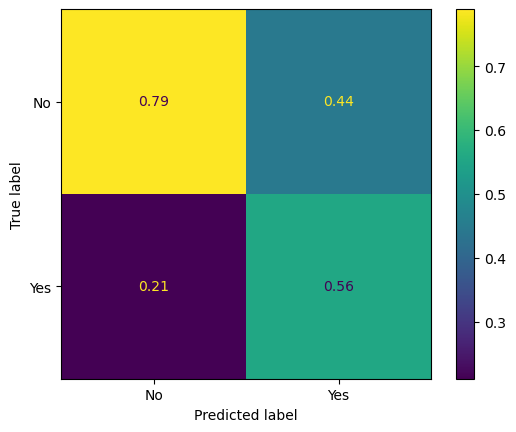

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='pred')
plt.show()

### MLPClassifier

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

mlp_clf= MLPClassifier(hidden_layer_sizes=(300,300,300), random_state=0)
mlp_clf.fit(X_train,y_train)







/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(300, 300, 300), random_state=0)

In [30]:
mlp_preds= mlp_clf.predict(X_test)
print(metrics.classification_report(y_test,mlp_preds))

print(metrics.balanced_accuracy_score(y_test,mlp_preds))



              precision    recall  f1-score   support

          No       0.76      0.68      0.72        19
         Yes       0.45      0.56      0.50         9

    accuracy                           0.64        28
   macro avg       0.61      0.62      0.61        28
weighted avg       0.67      0.64      0.65        28

0.6198830409356726


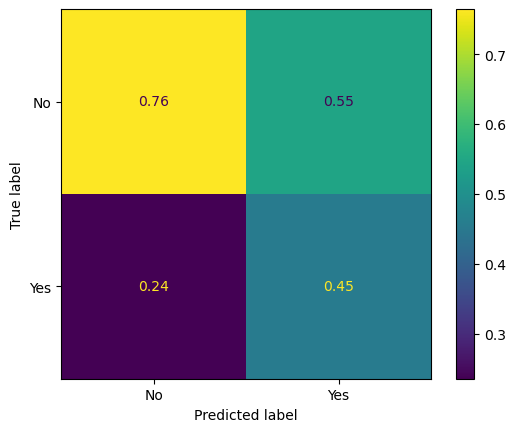

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test,mlp_preds,normalize='pred')
plt.show()

### LightGBM

In [32]:
from lightgbm import LGBMClassifier

lgbm_clf= LGBMClassifier()
lgbm_clf.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 59, number of negative: 49
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 108, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546296 -> initscore=0.185717
[LightGBM] [Info] Start training from score 0.185717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier()

In [33]:
lgbm_pred=lgbm_clf.predict(X_test)
print(metrics.classification_report(y_test,lgbm_pred))

print(metrics.balanced_accuracy_score(y_test,lgbm_pred))

              precision    recall  f1-score   support

          No       0.83      0.79      0.81        19
         Yes       0.60      0.67      0.63         9

    accuracy                           0.75        28
   macro avg       0.72      0.73      0.72        28
weighted avg       0.76      0.75      0.75        28

0.7280701754385965


/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


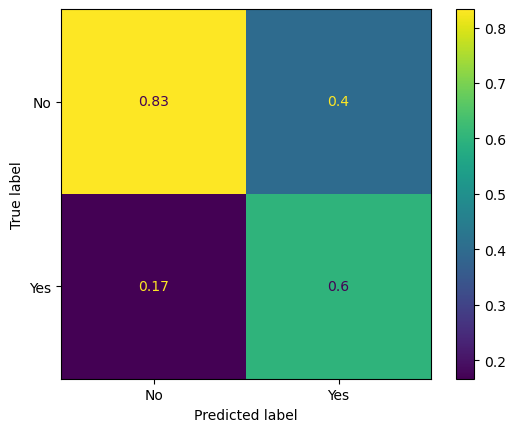

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test,lgbm_pred,normalize='pred')
plt.show()

## Throat samples

In [35]:
X_N_array = nose_diff_abundance.get_data(sparse=False)
y_N_array = nose_diff_abundance.sample_metadata['smoker'].values

In [36]:
print(X_N_array)
X_N_array.shape

[[1.04300544e+03 2.17498764e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.16760300e+03 3.04307116e+02 4.68164794e+00 ... 0.00000000e+00
  4.68164794e+00 0.00000000e+00]
 [3.99546485e+03 1.17913832e+02 4.08163265e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.16216216e+03 2.56756757e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.31950745e+03 1.19896306e+02 6.48088140e+00 ... 0.00000000e+00
  0.00000000e+00 3.24044070e+00]
 [1.84005202e+03 2.66579974e+02 1.95058518e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


(136, 74)

In [37]:
X_N_array.shape

(136, 74)

In [38]:
print(y_N_array)
y_N_array.shape

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']


(136,)

In [39]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split( X_N_array, y_N_array, test_size=0.2, random_state=43)
clf1 = RandomForestClassifier(random_state=43)
clf1.fit(Xn_train, yn_train)


RandomForestClassifier(random_state=43)

In [40]:
y_pred = clf1.predict(Xn_test)
print(classification_report(yn_test, y_pred))
print(clf1.score(Xn_test,yn_test))

              precision    recall  f1-score   support

          No       0.67      0.92      0.77        13
         Yes       0.90      0.60      0.72        15

    accuracy                           0.75        28
   macro avg       0.78      0.76      0.75        28
weighted avg       0.79      0.75      0.75        28

0.75


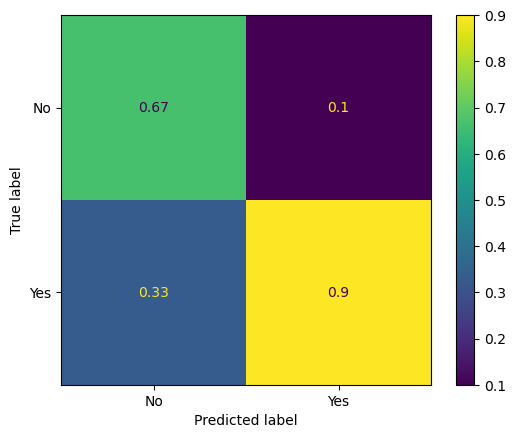

In [41]:
ConfusionMatrixDisplay.from_predictions(yn_test,y_pred,normalize='pred')
plt.show()

# Model built on both sample

## features are concatenated  using horizontal stack to preserve sample size

In [42]:

X_M= np.hstack([X_array,X_N_array])
print(X_M.shape)

(136, 97)


In [43]:
# Y_M= np.hstack([y_array,y_N_array])
# print(Y_M.shape)

In [44]:
# print('X_array shape:', y.shape)
# print('X_N_array shape:', y_N_array.shape)
# Y_M = np.hstack([y_array, y_N_array])
# print('X_M shape:', Y_M.shape)

In [45]:
print('X_array shape:', X_array.shape)
print('X_N_array shape:', X_N_array.shape)
X_M = np.hstack([X_array, X_N_array])
print('X_M shape:', X_M.shape)

X_array shape: (136, 23)
X_N_array shape: (136, 74)
X_M shape: (136, 97)


## Voting classifier

In [46]:
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(  X_M, y, test_size=0.25, random_state=42)


# clf1=MLPClassifier(hidden_layer_sizes=(300,300,300), random_state=1)
clf1 = RandomForestClassifier(random_state=42)
# clf2 = RandomForestClassifier(max_depth=5, random_state=42)
clf3= LGBMClassifier()
clf4=MLPClassifier(hidden_layer_sizes=(300,300,300), random_state=0)

eclf = VotingClassifier(estimators=[('Rf', clf1),
                                    # ('Rf', clf2),
                                    ('lbgm',clf3),
                                    ('mlp',clf4)], 
                                    voting='soft')
eclf.fit(X_train, y_train)




/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 54, number of negative: 48
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 102, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529412 -> initscore=0.117783
[LightGBM] [Info] Start training from score 0.117783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

VotingClassifier(estimators=[('Rf', RandomForestClassifier(random_state=42)),
                             ('lbgm', LGBMClassifier()),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(300, 300, 300),
                                            random_state=0))],
                 voting='soft')

In [47]:
Y_pred = eclf.predict(X_test)
print(classification_report(y_test, Y_pred))
print('Test Accuracy:', eclf.score(X_test, y_test))

              precision    recall  f1-score   support

          No       0.95      0.90      0.92        20
         Yes       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34

Test Accuracy: 0.9117647058823529


/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [63]:
print("Training Accuracy: {:.3f}".format(eclf.score(X_train, y_train)))
print("Test Accuracy: {:.3f}".format(eclf.score(X_test, y_test)))


Training Accuracy: 1.000
Test Accuracy: 0.912


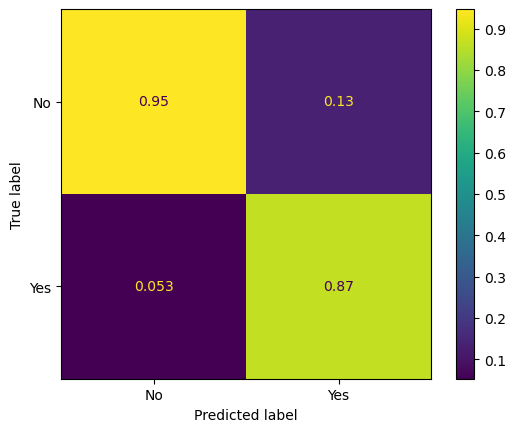

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,Y_pred,normalize='pred')
plt.show()   
## ovefitting 

# RandomSearchCV

In [49]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
seed=0
clf_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

PARAM_GRID = {
    # LGBM CLASSIFIER WORKS BETTER ON GPU
    LGBMClassifier: {
        "clf__n_estimators": np.random.uniform(50, 500, 10).astype(int).tolist(),
        "clf__max_depth": np.random.uniform(5, 50, 10).astype(int).tolist(),
        "clf__num_leaves": np.random.uniform(31, 100, 10).astype(int).tolist(),
        "clf__learning_rate": np.random.uniform(0.001, 0.5, 10).tolist(),
        "clf__subsample": np.random.uniform(0.3, 0.9, 10).tolist(),
        "clf__reg_alpha": np.random.uniform(0.1, 10, 10).tolist(),
        "clf__reg_lambda": np.random.uniform(0.1, 10, 10).tolist(),
        "clf__colsample_bytree": np.random.uniform(0.3, 0.9, 10).tolist(),
        "clf__min_data_in_leaf": np.random.uniform(100, 1000, 10).astype(int).tolist(),
        "clf__verbose": [-1],
        "clf__silent":[True],
        "clf__random_state":[seed]
    },
    RandomForestClassifier: {
       # "clf__ccp_alpha": np.random.uniform(0, 1, 10).astype(float).tolist(),
        "clf__max_depth": np.random.uniform(1, 250, 10).astype(int).tolist(),
        "clf__n_estimators":np.random.uniform(50, 500, 10).astype(int).tolist(),
       # "clf__criterion": ['gini', 'entropy'],
        "clf__random_state":[seed]
    },
    # BaggingClassifier: {
    #     "clf__max_features":np.random.uniform(0.3, 1, 10).astype(float).tolist(),
    #     "clf__random_state":[seed],
    #     "clf__n_estimators":np.random.uniform(10, 100, 10).astype(int).tolist()
    # }, 
    MLPClassifier: {
        "clf__activation":['logistic', 'tanh', 'relu'],
        "clf__solver": ['lbfgs', 'sgd', 'adam'],
        "clf__learning_rate_init": np.random.uniform(0.001, 0.5, 10).tolist(),
        "clf__tol": np.random.uniform(0.001, 0.5, 10).tolist()
    }

}

MODELS = [LGBMClassifier, RandomForestClassifier, MLPClassifier]

In [54]:
import warnings
from sklearn.pipeline import Pipeline
import time
import datetime
warnings.filterwarnings("ignore", category=FutureWarning)

best_estimators = {}

for i, model in enumerate(MODELS):
    start_time = time.time()
    print("Task {} of {}".format(i+1, len(MODELS)))
    print("Working on: {}".format(model.__name__))
    pipeline = Pipeline([('clf', model())])
    model_grid = RandomizedSearchCV(pipeline
                                   , param_distributions=PARAM_GRID[model]
                                   , n_iter=30
                                   , scoring='balanced_accuracy'
                                   , cv=clf_cv
                                   , random_state=seed
                                   , verbose=0
                                   , n_jobs=10
                                   )
    model_grid.fit(X_train, y_train)
    best_estimators[model.__name__] = model_grid.best_estimator_
    
    print("\tElapsed time is {} .".format(datetime.timedelta(seconds=time.time() - start_time)))

Task 1 of 3
Working on: LGBMClassifier


/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.12

	Elapsed time is 0:00:02.181306 .
Task 2 of 3
Working on: RandomForestClassifier
	Elapsed time is 0:00:15.046066 .
Task 3 of 3
Working on: MLPClassifier


/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    http

	Elapsed time is 0:00:11.502337 .


In [58]:

estimators = [('lgbm',best_estimators['LGBMClassifier']),('RandomForest', best_estimators['RandomForestClassifier'])
              ,('MLP', best_estimators['MLPClassifier'])]

_voting_classifier = VotingClassifier(estimators=estimators, n_jobs=10)

_voting_classifier.fit(X_train, y_train)

voting_preds = _voting_classifier.predict(X_test)
print(metrics.classification_report(y_test, voting_preds ))
print("Balanced Accuracy: {:.2f}".format(metrics.balanced_accuracy_score(y_test, voting_preds)))


              precision    recall  f1-score   support

          No       0.87      0.65      0.74        20
         Yes       0.63      0.86      0.73        14

    accuracy                           0.74        34
   macro avg       0.75      0.75      0.74        34
weighted avg       0.77      0.74      0.74        34

Balanced Accuracy: 0.75


/opt/conda/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [59]:
print("Training Accuracy: {:.2f}".format(_voting_classifier.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(_voting_classifier.score(X_test, y_test)))


Training Accuracy: 1.00
Test Accuracy: 0.74


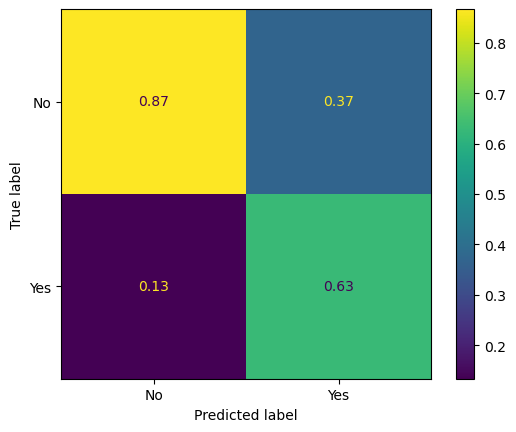

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test,voting_preds,normalize='pred')
plt.show()

# Inference 

## Performance of Voting classfier vs individial sampled models
>eclf voting classfifer has  test acc of 0.9 and train of 1 , inidvidual classes are above 85 percentile and  13% of gt were false prediction
>
>RandomSearchcv has test acc of 0.75 & indivdual score for smoker class is above average 

###  RandomsearchCV return lower accuracy when compared with the voting classifer with params explicitly laid ,to improve on this model  LTSM can be tried , best practises should be followed i have not normalised data , lable enocded classes to values